In [ ]:
# Standard IPython notebook imports
%matplotlib inline

import os
from io import StringIO

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sstats
import seaborn as sns
import sklearn.ensemble
import sklearn.tree
from sklearn.linear_model import LinearRegression
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
sns.set_style("whitegrid")


In [ ]:
# Data
import csv
import io
import urllib.request
pd.set_option('display.max_columns', None)

# Data urls
url = 'https://storage.googleapis.com/kagglesdsdata/competitions/24762/1825116/public_data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1610277409&Signature=E9oCjog0%2FRkxx0lP0bMQiD7xxFDuZHc1UIpIfSCVsM3MECWK8GEflouut%2B0AB9mDUivW8rtOWV%2BwfRfDm5X%2Bv7TBAo%2FbNfPO%2F5K8%2FblN3%2FT9uL2OhTmfjJAYCVYYG5uaZSAbV2F6ViU67sAK5va1VvV5eqZAAHnEQXtIbAXAiUXA3U08BT2U04yjiWsskMRZaxdqbR%2BRIVRnWe9jXyi37DDoP%2Fj9mx%2FzQN2998W10tTiUnaT88DtbDIyTF84G2LPQGgfWpq4meHvCHaM7gONyMYZfB1jYvGmMugNw3Rod0B5z%2FqD12yM0s10hKx79CqtlfJJ65ds%2F9LJGezswCo0ZQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dpublic_data.csv'

# Download data
data = None
with urllib.request.urlopen(url) as response:
    data = io.StringIO(response.read().decode('UTF-8'))

# Import data into dataframes
names = ['target'] + [str(x + 1) for x in range(93)]
data_types = {}
data_types['target'] = 'string'
for i in range(1, 33):
    data_types[str(i)] = 'float32'
for i in range(34, 73):
    data_types[str(i)] = 'string'
for i in range(73, 94):
    data_types[str(i)] = 'bool'


df = pd.read_csv(data, names=names)
df = df.astype(data_types)
df = df[1:]
df['target'] = df['target'].map(lambda t: float(t))
df['target'] = df['target'].map(lambda t: 1 if t > 0 else 0)
df['target'] = df['target'].astype(bool)
for i in range(34, 73):
    df[str(i)] = df[str(i)].map(lambda t: t[1:])
for i in range(34, 73):
    df[str(i)] = df[str(i)].astype('int32')

print(df.head(20))



    target         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72     73     74     75     76     77     78     79     80     81     82     83     84     85     86     87     88     89     90     91     92     93
1   False   0.560880  0.486848  0.193378  0.156993  0.837331  0.046318  0.188749  0.736078  0.441067  0.698463  0.640968  0.446609  0.170447  0.195756  0.506325  0.473230  0.422064  0.637487  0.706186  0.162856  0.729169  0.062124  0.053928  0.154360  0.142998  0.183121  0.186869  0.149538  0.937433  0.131475  0.523914  0.670421  0.553797  26  9   0   2 

In [ ]:
# train, test = train_test_split(df, test_size=0)
train = df

X = train.drop('target', axis=1)
y = train['target']

In [ ]:
'''Lasso Regression''' 

#Fit the model
clf = LassoCV().fit(X, y)

#Selected features
importance = np.abs(clf.coef_)
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:15]
name_features = np.array(names)[idx_features]
print('Selected features: {}'.format(name_features))


Selected features: ['21' '35' '3' '38' '69' '10' '29' '78' '54' '71' '36' '44' '58' '52' '87']


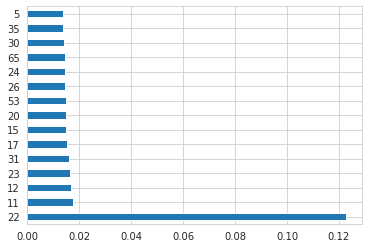

In [ ]:
'''ExtraTreesClassifier'''

#Fit the model
etc_model = ExtraTreesClassifier()
etc_model.fit(X,y)

#plot graph of feature importances
feat_importances = pd.Series(etc_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Selected features: ['21' '23' '22' '35' '25' '16' '84' '17' '85' '32' '55' '74' '31' '71'
 '81']


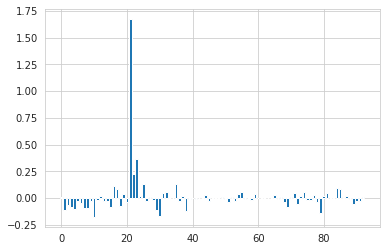

In [ ]:
'''linear regression'''

# define the model
l_model = LinearRegression()

# fit the model
l_model.fit(X, y)

# get importance
importance = l_model.coef_

# summarize feature importance
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:15]
name_features = np.array(names)[idx_features]
print('Selected features: {}'.format(name_features))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
